# BeautifulSoup

In [1]:
!pip install bs4

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=49d2593f794a2091451bea599960474a0f1f53c5204bb11ee28d2409dd3b3e9b
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [2]:
import requests
from bs4 import BeautifulSoup

## 1. requests 라이브러리를 활용한 HTML 페이지 요청
res 객체에 HTML 데이터가 저장되고 res content로 데이터를 추출할 수 있음


```
res = requests.get("http://v.media.daum.net/v/20170615203441266")
print(res.content)
```


## 2. HTML 페이지 파싱 BeautifulSoup(HTML 데이터, 파싱방법)


```
soup = BeautifulSoup(res.content, ‘html.parser')
```


## 3. 필요한 데이터 검색


```
title = soup.find(‘title')
```



## 4. 필요한 데이터 추출


```
print(title.get_text())
```



In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,778 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121666 files and dire

# 로또

In [153]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://dhlottery.co.kr/common.do?method=main')
soup = bs(res.content, 'html.parser')
result = soup.select('.ball_645')
data = []
for num in result:
 data.append(int(num.text))
data

[12, 16, 21, 24, 41, 43, 15]

In [154]:
import pandas as pd
df = pd.Series(data)
df

0    12
1    16
2    21
3    24
4    41
5    43
6    15
dtype: int64

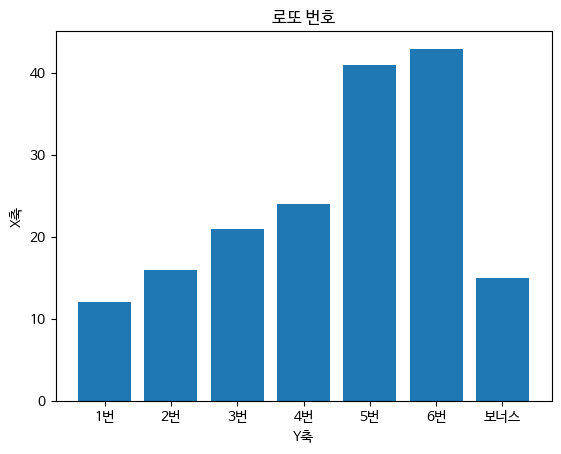

In [161]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.bar(['1번','2번','3번','4번','5번','6번','보너스'], data)
plt.title("로또 번호")
plt.xlabel('Y축')
plt.ylabel('X축')
fig = plt.gcf()
plt.savefig('lotto.png')

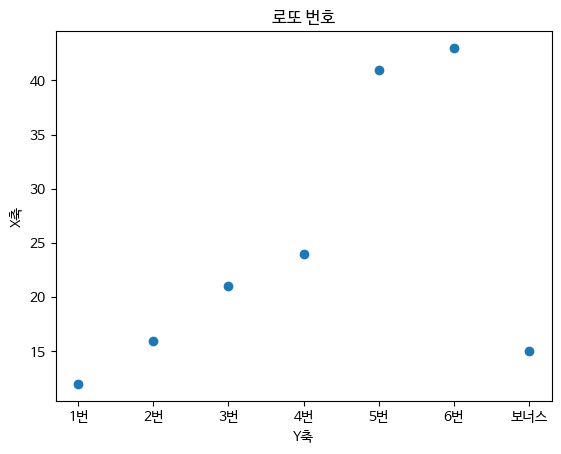

In [162]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.scatter(['1번','2번','3번','4번','5번','6번','보너스'], data)
plt.title("로또 번호")
plt.xlabel('Y축')
plt.ylabel('X축')
fig = plt.gcf()
plt.savefig('lotto1.png')

# 네이버 날씨

In [124]:
# 네이버 날씨
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%84%9C%EC%9A%B8+%EB%82%A0%EC%94%A8&oquery=%EB%82%A0%EC%94%A8&tqi=ihZ7Csqo1LVssjWcNxZssssssvd-001074')

In [151]:
soup = bs(res.content, 'html.parser')
result = soup.select('.temperature_text')

data = []
for num in result:
  data.append(num.text)

print(data)

[' 현재 온도-2.1° ', ' 예측 온도-8° ', ' 예측 온도-5° ', ' 예측 온도-15° ', ' 예측 온도-8° ']


In [206]:
# 오늘 하루 기온을 차트로 그리기 (bar chart말고 꺾은선으로)

# 네이버 날씨
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%84%9C%EC%9A%B8+%EB%82%A0%EC%94%A8&oquery=%EB%82%A0%EC%94%A8&tqi=ihZ7Csqo1LVssjWcNxZssssssvd-001074')

soup = bs(res.content, 'html.parser')
x_result = soup.select('.time > em')
y_result = soup.select('.num')

# # x: 시간 y: 온도
x = []
y = []

for time in x_result:
  x.append(time.text)

for num in y_result:
  y.append(num.text)

cnt = 0
for time in x:
  if '내일' in time:
    break
  else:
    cnt += 1

print(cnt)


10


In [207]:
today_temp = x[:cnt]
today_time = y[:cnt]
result_list = [int(s[:-1]) for s in today_time]

In [208]:
result_list

[-1, 0, 0, -1, -1, -1, -1, -1, -2, -2]

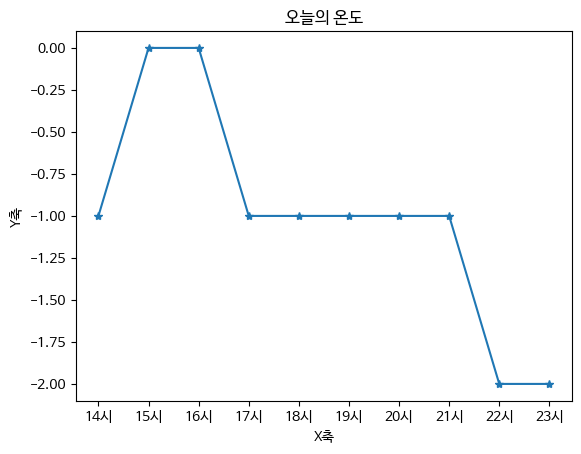

In [209]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

plt.plot(today_temp, result_list, '-*')
plt.title("오늘의 온도")
plt.xlabel('X축')
plt.ylabel('Y축')
plt.show()

# 뉴스 기사

In [210]:
!pip install newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=7ef5a8b2935a0fcaa01c738c741703f6c4d4d4262687ce8370f28994e9a6c4ad
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=5610f38aac92d7bab2fb8e3c47b9bd44fed3db022ce7662b693ea9a5f1945748
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc

In [221]:
# 텍스트
import newspaper as news
link = 'https://n.news.naver.com/mnews/hotissue/article/469/0000775622?type=series&cid=1018612'
article = news.Article(link, language='ko')
article.download()
article.parse()
print(article.text)

모두에게 보여주고 싶은 기사라면?beta 이 기사를 추천합니다 버튼을 눌러주세요.

집계 기간 동안 추천을 많이 받은 기사는 네이버 자동 기사배열 영역에 추천 요소로 활용됩니다. 레이어 닫기


In [222]:
# 구조
import requests
from bs4 import BeautifulSoup as bs
url = 'https://n.news.naver.com/mnews/hotissue/article/469/0000775622?type=series&cid=1018612'
res = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})
res.content

b'<!doctype html>\n<html lang="ko" data-useragent="Mozilla/5.0">\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" />\n\t\t<meta property="og:title" content="[\xea\xb0\x80\xec\xa1\xb1] \xec\x98\xac\xeb\xac\xb4\xec\x97\x90 \xea\xb1\xb8\xeb\xa6\xb0 \xec\xb1\x84 \xeb\x96\xa0\xeb\x8f\x8c\xeb\x8b\xa4 \xec\x82\xac\xeb\x9e\x8c\xec\x97\x90\xea\xb2\x8c \xed\x8f\xad \xec\x95\x88\xea\xb8\xb0\xeb\xa9\xb0 \xea\xb5\xac\xec\xa1\xb0\xeb\x90\x9c \xeb\xaf\xb9\xec\x8a\xa4\xea\xb2\xac">\n\t\t<meta property="og:type" content="article">\n\t\t<meta property="og:url" content="https://n.news.naver.com/mnews/hotissue/article/469/0000775622?cid&#x3D;1018612">\n\t\t<meta property="og:image" content="https://imgnews.pstatic.net/image/469/2023/12/17/0000775622_001_20231217150201569.jpg?type&#x3D;w800">\n\t\t<meta property="og:description" c

In [239]:
import os
import requests
from bs4 import BeautifulSoup
url = "https://n.news.naver.com/mnews/hotissue/article/469/0000775622?type=series&cid=1018612"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')
if not(os.path.isdir("./dog")):
  os.makedirs(os.path.join("./dog"))
i = 1

for tag in soup.select('.nbd_a img'):
  print(tag)

<img class="_LAZY_LOADING" data-src="https://imgnews.pstatic.net/image/469/2023/12/17/0000775622_001_20231217150201569.jpg?type=w647" id="img1">
</img>
<img class="_LAZY_LOADING" data-src="https://imgnews.pstatic.net/image/469/2023/12/17/0000775622_002_20231217150201593.jpg?type=w647" id="img2">
</img>
<img class="_LAZY_LOADING" data-src="https://imgnews.pstatic.net/image/469/2023/12/17/0000775622_003_20231217150201617.jpg?type=w647" id="img3">
</img>
<img class="_LAZY_LOADING" data-src="https://imgnews.pstatic.net/image/469/2023/12/17/0000775622_004_20231217150201657.jpg?type=w647" id="img4">
</img>


In [238]:
import os
import requests
from bs4 import BeautifulSoup
url = "https://n.news.naver.com/mnews/hotissue/article/469/0000775622?type=series&cid=1018612"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')
if not(os.path.isdir("./dog")):
  os.makedirs(os.path.join("./dog"))
i = 1

for tag in soup.select('.nbd_a img'):
  img_url = tag['data-src']
  save_img = "./dog/" + str(i).zfill(3) + img_url[-4:]+".jpg"
  i += 1
  print(save_img + " : OK")
  headers = {'Referer': img_url}
  img_data = requests.get(img_url, headers=headers).content

  with open(save_img, 'wb') as f:
    f.write(img_data)

./dog/001w647.jpg : OK
./dog/002w647.jpg : OK
./dog/003w647.jpg : OK
./dog/004w647.jpg : OK


In [259]:
import requests
from bs4 import BeautifulSoup as bs
url = "http://www.cgv.co.kr/movies/detail-view/?midx=87554#commentReg"
res = requests.get(url)
soup = bs(res.content, 'html.parser')

print(soup)

result = soup.select('.box-comment > p')

data = []
for text in result:
 data.append(text)
print(data)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="No-Cache" http-equiv="Cache-Control"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="width=1024" name="viewport"/>
<meta content="CGV, 시지브이, 영화관, 극장, 영화, 티켓, 박스오피스, 극장, Movie, Theater, Cinema, Cgv, cgv, 예매, 상영작" name="keywords"/>
<meta content="영화 그 이상의 다양하고 즐거운 몰입의 경험을 만듭니다. 라이프스타일 플랫폼 CGV" name="description"/>
<meta content="영화 그 이상의 감동. CGV" property="og:site_name"/>
<meta content="서울의 봄 | 영화 그 이상의 감동. CGV" id="ctl00_og_title" property="og:title"/>
<meta content="https://img.cgv.co.kr/Movie/Thumbnail/Poster/000087/87554/87554_185.jpg" id="

In [265]:
# 영화 리뷰

url = "http://www.cine21.com/movie/info/?movie_id=58978"
res = requests.get(url)
soup = bs(res.content, 'html.parser')
result = soup.select('.comment')

data = []
for text in result:
 data.append(text.text)

data

['권력이 영원할 줄 아는 사악한 바보들에게',
 '검사의 봄에 되돌아보는, 뱀의 욕망이 낳은 탄식과 울분의 밤',
 '여러모로 아슬아슬하다',
 '‘어떻게 성공했지?’라는 궁금증과 하나회를 향한 분노가 왔다 갔다',
 '‘전두광 영화’가 되지 않았다는 점이 놀랍다',
 '바둑을 오셀로로 뒤집으려는 병법의 하룻밤']